In [42]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

In [44]:
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt
import time


In [45]:
from IPython.display import display, HTML
#display(HTML(dfTest.to_html()))


In [46]:
df =pd.read_csv('credit_scoring.csv',delimiter=';')

In [47]:
df.head()

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0,1
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0,1


In [48]:
df.describe()

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
count,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000
mean,7.985143,0.528229,46.518857,37.021714,0.271086,1.172114,0.364114,55.595200,130.848914,5298.431314,342.551543,1037.463771,1459.732343,0.722057
std,8.173922,0.499260,14.619282,10.973187,0.444571,0.377523,0.481236,19.451569,86.199518,10582.377366,1217.622800,469.753531,621.775995,0.448036
min,0.000000,0.000000,6.000000,18.000000,0.000000,1.000000,0.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.000000,0.000000
25%,2.000000,0.000000,36.000000,28.000000,0.000000,1.000000,0.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1116.500000,0.000000
50%,5.000000,1.000000,48.000000,36.000000,0.000000,1.000000,0.000000,51.000000,120.000000,3000.000000,0.000000,1000.000000,1400.000000,1.000000
75%,12.000000,1.000000,60.000000,45.000000,1.000000,1.000000,1.000000,72.000000,165.000000,6000.000000,0.000000,1300.000000,1688.000000,1.000000
max,48.000000,1.000000,72.000000,68.000000,1.000000,2.000000,1.000000,173.000000,959.000000,250000.000000,30000.000000,4500.000000,11140.000000,1.000000


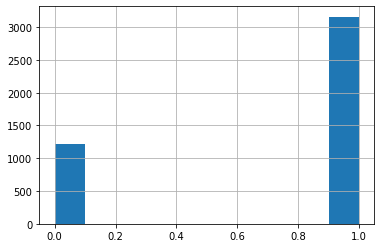

In [49]:
df.Status.hist()

In [50]:
df.shape

(4375, 14)

In [51]:
#X=df.iloc[:,:13].values
#Y=df.iloc[:,13].values
X=df.iloc[:,:13]
Y=df.iloc[:,13]

In [52]:
mp=100*np.sum(Y==0)/len(Y)
bp=100*np.sum(Y==1)/len(Y)
print("% Bon payeurs : {0:.2f} % Mauvais payeurs : {1:.2f}".format(bp,mp))

% Bon payeurs : 72.21 % Mauvais payeurs : 27.79


In [53]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.5,random_state=1)

In [54]:
mp=100*np.sum(Ytrain==0)/len(Ytrain)
bp=100*np.sum(Ytrain==1)/len(Ytrain)
print("% Bon payeurs : {0:.2f} % Mauvais payeurs : {1:.2f}".format(bp,mp))

% Bon payeurs : 72.02 % Mauvais payeurs : 27.98


In [55]:
mp=100*np.sum(Ytest==0)/len(Ytest)
bp=100*np.sum(Ytest==1)/len(Ytest)
print("% Bon payeurs : {0:.2f} % Mauvais payeurs : {1:.2f}".format(bp,mp))

% Bon payeurs : 72.39 % Mauvais payeurs : 27.61


In [56]:
def classifieurs(Xtrain,Xtest,Ytrain,Ytest,show=True):
    DT=DecisionTreeClassifier(criterion='gini',random_state=1) #CART
    DT.fit(Xtrain,Ytrain)
    YDT=DT.predict(Xtest)
    if show:
        print("Arbre de décision : Accuracy = {0:.2f}".format(accuracy_score(Ytest,YDT)*100))
        print(confusion_matrix(Ytest,YDT))

        print()

    KNN=KNeighborsClassifier(n_neighbors=5) #KNN
    KNN.fit(Xtrain,Ytrain)
    YKNN=KNN.predict(Xtest)
    
    if show:
        print("KNN : Accuracy = {0:.2f}".format(accuracy_score(Ytest,YKNN)*100))
        print(confusion_matrix(Ytest,YKNN))

        print()
        
        
        
    BAG=BaggingClassifier(n_estimators=100,random_state=1) #BAG
    BAG.fit(Xtrain,Ytrain)
    YBAG=BAG.predict(Xtest)
    if show:
        print("Bagging : Accuracy = {0:.2f}".format(accuracy_score(Ytest,YBAG)*100))
        print(confusion_matrix(Ytest,YBAG))
        print()
    return("Arbre de décision",accuracy_score(Ytest,YDT)*100,
           "KNN",accuracy_score(Ytest,YKNN)*100,
          "Bagging",accuracy_score(Ytest,YBAG)*100
          )

In [57]:
classifieurs(Xtrain,Xtest,Ytrain,Ytest)

Arbre de décision : Accuracy = 72.71
[[ 325  279]
 [ 318 1266]]

KNN : Accuracy = 72.49
[[ 189  415]
 [ 187 1397]]

Bagging : Accuracy = 78.29
[[ 330  274]
 [ 201 1383]]



('Arbre de décision',
 72.71480804387569,
 'KNN',
 72.48628884826326,
 'Bagging',
 78.29067641681901)

In [58]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)

# transform training data
X_train_norm = norm.transform(Xtrain)

# transform testing dataabs
X_test_norm = norm.transform(Xtest)
classifieurs(X_train_norm,X_test_norm,Ytrain,Ytest)

Arbre de décision : Accuracy = 72.85
[[ 325  279]
 [ 315 1269]]

KNN : Accuracy = 74.54
[[ 283  321]
 [ 236 1348]]

Bagging : Accuracy = 78.34
[[ 329  275]
 [ 199 1385]]



('Arbre de décision',
 72.85191956124314,
 'KNN',
 74.54296160877514,
 'Bagging',
 78.33638025594149)

In [59]:
SS=StandardScaler()
SS.fit(Xtrain)
Xtrain_norm=SS.transform(Xtrain)
Xtest_norm=SS.transform(Xtest)

classifieurs(Xtrain_norm,Xtest_norm,Ytrain,Ytest)

Arbre de décision : Accuracy = 72.71
[[ 322  282]
 [ 315 1269]]

KNN : Accuracy = 75.27
[[ 286  318]
 [ 223 1361]]

Bagging : Accuracy = 78.43
[[ 331  273]
 [ 199 1385]]



('Arbre de décision',
 72.71480804387569,
 'KNN',
 75.27422303473492,
 'Bagging',
 78.42778793418648)

In [60]:
X_train_stand = Xtrain.copy()
X_test_stand = Xtest.copy()

# numerical features
num_cols = ['Seniority','Time','Age','Expenses','Income','Assets' ,'Debt','Amount','Price']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])
classifieurs(X_train_stand,X_test_stand,Ytrain,Ytest)

Arbre de décision : Accuracy = 72.71
[[ 322  282]
 [ 315 1269]]

KNN : Accuracy = 76.05
[[ 258  346]
 [ 178 1406]]

Bagging : Accuracy = 78.43
[[ 331  273]
 [ 199 1385]]



('Arbre de décision',
 72.71480804387569,
 'KNN',
 76.05118829981718,
 'Bagging',
 78.42778793418648)

In [61]:
pca=PCA(n_components=3)
pca.fit(Xtrain_norm)
Xtrain_pca=np.concatenate((Xtrain_norm,pca.transform(Xtrain_norm)),axis=1)
Xtest_pca=np.concatenate((Xtest_norm,pca.transform(Xtest_norm)),axis=1)

classifieurs(Xtrain_pca,Xtest_pca,Ytrain,Ytest)

Arbre de décision : Accuracy = 73.63
[[ 351  253]
 [ 324 1260]]

KNN : Accuracy = 75.64
[[ 283  321]
 [ 212 1372]]

Bagging : Accuracy = 78.66
[[ 321  283]
 [ 184 1400]]



('Arbre de décision',
 73.62888482632542,
 'KNN',
 75.6398537477148,
 'Bagging',
 78.6563071297989)

In [62]:
pca=PCA(n_components=3)
pca.fit(X_train_stand)
Xtrain_pca=np.concatenate((X_train_stand,pca.transform(X_train_stand)),axis=1)
Xtest_pca=np.concatenate((X_test_stand,pca.transform(X_test_stand)),axis=1)

classifieurs(Xtrain_pca,Xtest_pca,Ytrain,Ytest)

Arbre de décision : Accuracy = 71.71
[[ 329  275]
 [ 344 1240]]

KNN : Accuracy = 76.19
[[ 250  354]
 [ 167 1417]]

Bagging : Accuracy = 77.47
[[ 311  293]
 [ 200 1384]]



('Arbre de décision',
 71.70932358318099,
 'KNN',
 76.18829981718464,
 'Bagging',
 77.46800731261426)

In [63]:
def getExplained_variance_ratio(Xnorm,component_number):
    pca=PCA(n_components=component_number)
    pca.fit(Xnorm)
    X_pca=pca.transform(Xnorm)
    return(pca.explained_variance_ratio_.sum(),X_pca)

In [64]:
def getComponentNumber(df,info_ratio,show=True):
    component_numbers,ratios=[],[]
    notYet=True
    X=df.iloc[:,1:].values
    labels = df.iloc[:, 0].values
    sd=StandardScaler()
    sd.fit(X)
    Xnorm=sd.transform(X)
    for component_number in range(1,Xnorm.shape[1]+1):
        ratio,X_pca=getExplained_variance_ratio(Xnorm,component_number)
        component_numbers.append(component_number)
        ratios.append(ratio)
        if ratio>=info_ratio and notYet:
            notYet=False
            
            minimal_component_number=component_number
    if show:
        print("{} est le nombre d'axes minimal pour conserver {:.0f} % des informations".format(minimal_component_number,info_ratio*100))
        plt.plot(component_numbers, 100*np.array(ratios))
        plt.grid()
        plt.xlabel('Nombre des composants')
        plt.ylabel('Information rentenues')
    return(minimal_component_number)

In [65]:
def pca(file,info_ratio,show=True):
    df=pd.read_csv(file,delimiter=';')
    #info_ratio=float(input('Quel est le minimum de l’information que vous souhaitez retenir en % : '))
    return(getComponentNumber(df,info_ratio,show))

5 est le nombre d'axes minimal pour conserver 60 % des informations


5

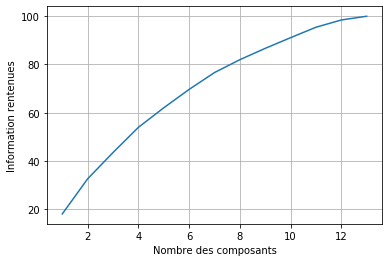

In [66]:
pca('./credit_scoring.csv',0.6,show=True)

In [67]:
show=False
metricTrace=[]
dt,dtAcc,knn,knnAcc,bag,bagAcc="",0.0,"",0.0,"",0.0
show and print('*'*20+"nombre des composants PCA : 0"+'*'*20)
dt,dtAcc,knn,knnAcc,bag,bagAcc=classifieurs(X_train_stand,X_test_stand,Ytrain,Ytest,show=show)
metricTrace.append([0,dt,round(dtAcc,2),knn,round(knnAcc,2),bag,round(bagAcc,2)])
for i in range(1,14):
    pca=PCA(n_components=i)
    pca.fit(Xtrain_norm)
    Xtrain_pca=np.concatenate((X_train_stand,pca.transform(X_train_stand)),axis=1)
    Xtest_pca=np.concatenate((X_test_stand,pca.transform(X_test_stand)),axis=1)
    show and print('*'*20+"nombre des composants PCA : {}".format(i)+'*'*20)
    dt,dtAcc,knn,knnAcc,bag,bagAcc=classifieurs(Xtrain_pca,Xtest_pca,Ytrain,Ytest,show=show)
    metricTrace.append([i,dt,round(dtAcc,2),knn,round(knnAcc,2),bag,round(bagAcc,2)])

In [68]:
 metricTrace

[[0, 'Arbre de décision', 72.71, 'KNN', 76.05, 'Bagging', 78.43],
 [1, 'Arbre de décision', 73.45, 'KNN', 76.1, 'Bagging', 78.11],
 [2, 'Arbre de décision', 71.25, 'KNN', 76.51, 'Bagging', 78.2],
 [3, 'Arbre de décision', 70.48, 'KNN', 76.33, 'Bagging', 78.06],
 [4, 'Arbre de décision', 71.62, 'KNN', 75.69, 'Bagging', 78.47],
 [5, 'Arbre de décision', 71.39, 'KNN', 76.33, 'Bagging', 78.43],
 [6, 'Arbre de décision', 71.98, 'KNN', 76.46, 'Bagging', 78.2],
 [7, 'Arbre de décision', 70.7, 'KNN', 76.74, 'Bagging', 77.51],
 [8, 'Arbre de décision', 71.62, 'KNN', 76.78, 'Bagging', 78.06],
 [9, 'Arbre de décision', 70.93, 'KNN', 76.55, 'Bagging', 77.83],
 [10, 'Arbre de décision', 70.57, 'KNN', 76.55, 'Bagging', 78.11],
 [11, 'Arbre de décision', 70.48, 'KNN', 76.46, 'Bagging', 78.38],
 [12, 'Arbre de décision', 69.93, 'KNN', 76.19, 'Bagging', 78.29],
 [13, 'Arbre de décision', 70.02, 'KNN', 76.05, 'Bagging', 78.47]]

In [69]:
show=False
metricTrace=[]
dt,dtAcc,knn,knnAcc,bag,bagAcc="",0.0,"",0.0,"",0.0
show and print('*'*20+"nombre des composants PCA : 0"+'*'*20)
dt,dtAcc,knn,knnAcc,bag,bagAcc=classifieurs(Xtrain_norm,Xtest_norm,Ytrain,Ytest,show=show)
metricTrace.append([0,dt,round(dtAcc,2),knn,round(knnAcc,2),bag,round(bagAcc,2)])
for i in range(1,14):
    pca=PCA(n_components=i)
    pca.fit(Xtrain_norm)
    Xtrain_pca=np.concatenate((Xtrain_norm,pca.transform(Xtrain_norm)),axis=1)
    Xtest_pca=np.concatenate((Xtest_norm,pca.transform(Xtest_norm)),axis=1)
    show and print('*'*20+"nombre des composants PCA : {}".format(i)+'*'*20)
    dt,dtAcc,knn,knnAcc,bag,bagAcc=classifieurs(Xtrain_pca,Xtest_pca,Ytrain,Ytest,show=show)
    metricTrace.append([i,dt,round(dtAcc,2),knn,round(knnAcc,2),bag,round(bagAcc,2)])

In [70]:
 metricTrace

[[0, 'Arbre de décision', 72.71, 'KNN', 75.27, 'Bagging', 78.43],
 [1, 'Arbre de décision', 71.76, 'KNN', 75.23, 'Bagging', 78.61],
 [2, 'Arbre de décision', 72.49, 'KNN', 75.5, 'Bagging', 78.75],
 [3, 'Arbre de décision', 73.63, 'KNN', 75.64, 'Bagging', 78.66],
 [4, 'Arbre de décision', 71.8, 'KNN', 75.23, 'Bagging', 79.11],
 [5, 'Arbre de décision', 71.85, 'KNN', 75.69, 'Bagging', 78.66],
 [6, 'Arbre de décision', 71.16, 'KNN', 75.69, 'Bagging', 78.47],
 [7, 'Arbre de décision', 70.52, 'KNN', 75.82, 'Bagging', 77.97],
 [8, 'Arbre de décision', 70.52, 'KNN', 75.73, 'Bagging', 77.7],
 [9, 'Arbre de décision', 70.84, 'KNN', 75.55, 'Bagging', 77.88],
 [10, 'Arbre de décision', 69.61, 'KNN', 75.37, 'Bagging', 77.74],
 [11, 'Arbre de décision', 70.2, 'KNN', 75.46, 'Bagging', 77.29],
 [12, 'Arbre de décision', 70.61, 'KNN', 74.95, 'Bagging', 77.33],
 [13, 'Arbre de décision', 71.98, 'KNN', 75.27, 'Bagging', 78.15]]

# Overall 3 is a good number of components

pca=PCA(n_components=3)
pca.fit(Xtrain_norm)
Xtrain_pca=np.concatenate((Xtrain_norm,pca.transform(Xtrain_norm)),axis=1)
Xtest_pca=np.concatenate((Xtest_norm,pca.transform(Xtest_norm)),axis=1)

classifieurs(Xtrain_pca,Xtest_pca,Ytrain,Ytest)


In [71]:
BAG=BaggingClassifier(n_estimators=100,random_state=1) #BAG
BAG.fit(Xtrain,Ytrain)
YBAG=BAG.predict(Xtest)
print("Bagging : Accuracy = {0:.2f}".format(accuracy_score(Ytest,YBAG)*100))
print(confusion_matrix(Ytest,YBAG))

Bagging : Accuracy = 78.29
[[ 330  274]
 [ 201 1383]]


# Exploration

In [72]:
df.apply(lambda x: sum(x.isnull()),axis=0) 
#no missing values

Seniority    0
Home         0
Time         0
Age          0
Marital      0
Records      0
Job          0
Expenses     0
Income       0
Assets       0
Debt         0
Amount       0
Price        0
Status       0
dtype: int64

In [73]:
df.describe()

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
count,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000
mean,7.985143,0.528229,46.518857,37.021714,0.271086,1.172114,0.364114,55.595200,130.848914,5298.431314,342.551543,1037.463771,1459.732343,0.722057
std,8.173922,0.499260,14.619282,10.973187,0.444571,0.377523,0.481236,19.451569,86.199518,10582.377366,1217.622800,469.753531,621.775995,0.448036
min,0.000000,0.000000,6.000000,18.000000,0.000000,1.000000,0.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.000000,0.000000
25%,2.000000,0.000000,36.000000,28.000000,0.000000,1.000000,0.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1116.500000,0.000000
50%,5.000000,1.000000,48.000000,36.000000,0.000000,1.000000,0.000000,51.000000,120.000000,3000.000000,0.000000,1000.000000,1400.000000,1.000000
75%,12.000000,1.000000,60.000000,45.000000,1.000000,1.000000,1.000000,72.000000,165.000000,6000.000000,0.000000,1300.000000,1688.000000,1.000000
max,48.000000,1.000000,72.000000,68.000000,1.000000,2.000000,1.000000,173.000000,959.000000,250000.000000,30000.000000,4500.000000,11140.000000,1.000000


In [74]:
df.Time.value_counts()

60.0    1907
36.0     926
48.0     843
24.0     338
12.0     146
18.0      89
30.0      48
6.0       31
42.0      29
54.0      17
72.0       1
Name: Time, dtype: int64

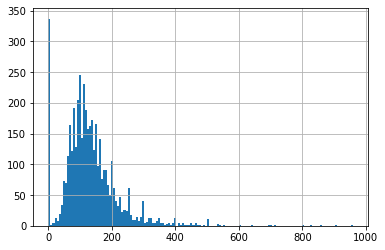

In [75]:
df.Income.hist(bins=150)

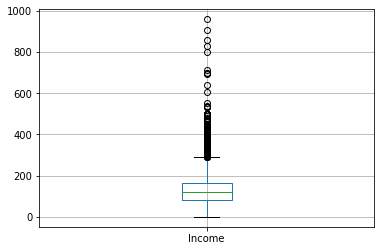

In [76]:
df.boxplot(column='Income')

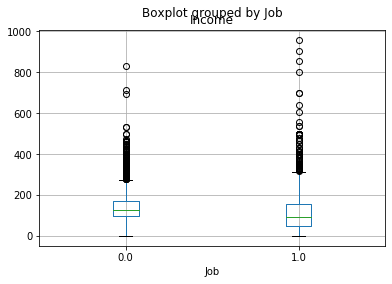

In [77]:
df.boxplot(column='Income',by='Job')

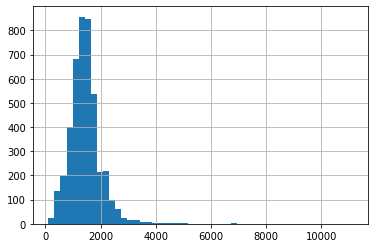

In [78]:
df.Price.hist(bins=50)

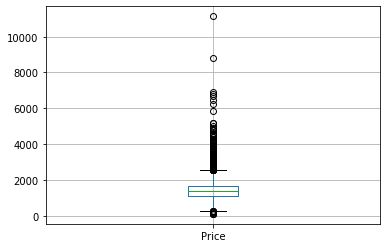

In [79]:
df.boxplot(column='Price')

In [80]:
temp1 = df['Records'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Status',index=['Records'],aggfunc=lambda x: x.mean())
print ('Frequency Table for Records:') 
print (temp1)

print ('\nProbility of getting loan for each Records class:')
print (temp2)

Frequency Table for Records:
2.0     753
1.0    3622
Name: Records, dtype: int64

Probility of getting loan for each Records class:
           Status
Records          
1.0      0.778575
2.0      0.450199


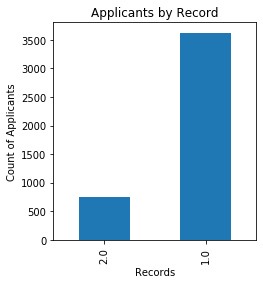

In [81]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Records')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Record")
temp1.plot(kind='bar')


Text(0.5, 1.0, 'Probability of getting loan by credit history')

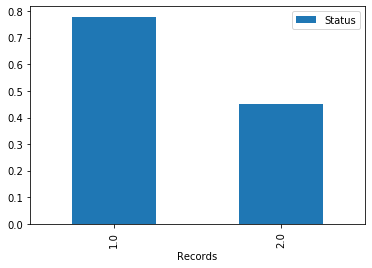

In [82]:

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Records')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

Text(0.5, 1.0, 'Probability of getting loan by credit history')

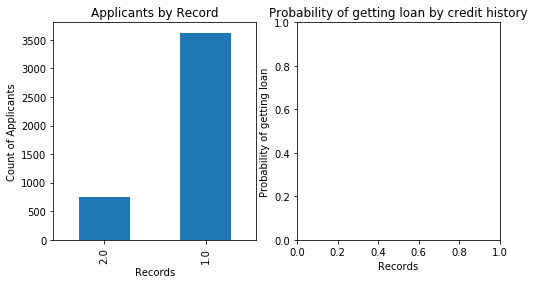

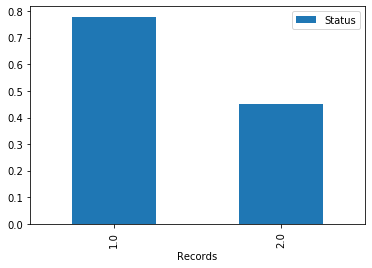

In [83]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Records')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Record")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)

temp2.plot(kind='bar')

ax2.set_xlabel('Records')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

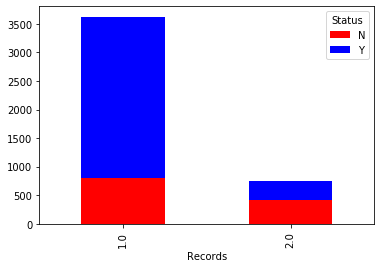

In [84]:
temp3 = pd.crosstab(df['Records'], df['Status'].map({1:'Y',0:'N'}))
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

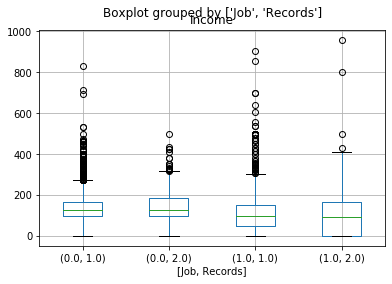

In [85]:
df.boxplot(column='Income',by=['Job','Records'])

# pca=PCA(n_components=3)
pca.fit(X_train_stand)
Xtrain_pca=np.concatenate((X_train_stand,pca.transform(X_train_stand)),axis=1)
Xtest_pca=np.concatenate((X_test_stand,pca.transform(X_test_stand)),axis=1)

classifieurs(Xtrain_pca,Xtest_pca,Ytrain,Ytest)

In [86]:
pca=PCA(n_components=3)
pca.fit(X_train_stand)
Xtrain_pca=np.concatenate((X_train_stand,pca.transform(X_train_stand)),axis=1)
Xtest_pca=np.concatenate((X_test_stand,pca.transform(X_test_stand)),axis=1)

nom_cols=list(X_train_stand.columns)
nom_cols+=['PCA1','PCA2','PCA3']
Xtrain_pca=pd.DataFrame(data=Xtrain_pca, columns=nom_cols)
Xtest_pca=pd.DataFrame(data=Xtest_pca, columns=nom_cols)


['Income', 'Seniority', 'PCA2', 'PCA3', 'Price', 'PCA1', 'Amount', 'Age', 'Records', 'Assets', 'Expenses', 'Job', 'Time', 'Debt', 'Home', 'Marital']


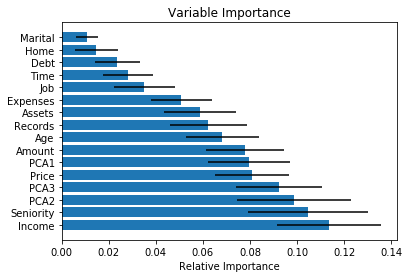

In [87]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(Xtrain_pca, Ytrain)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
features =nom_cols
#print(features[sorted_idx])
sortedFeatures=[features[index] for index in sorted_idx]
print(sortedFeatures)
padding = np.arange(Xtrain_pca.size/len(Xtrain_pca)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding,sortedFeatures)
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

# KNN

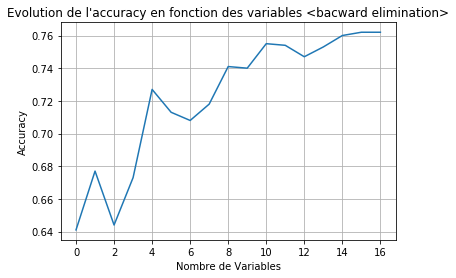

In [88]:
KNN=KNeighborsClassifier(n_neighbors=5)
scores=np.zeros(Xtrain_pca.shape[1]+1)
for f in np.arange(0, Xtrain_pca.shape[1]+1):
 X1_f = Xtrain_pca.iloc[:,np.flip(sorted_idx)[:f+1]]
 X2_f = Xtest_pca.iloc[:,np.flip(sorted_idx)[:f+1]]
 KNN.fit(X1_f,Ytrain)
 YKNN=KNN.predict(X2_f)
 scores[f]=np.round(accuracy_score(Ytest,YKNN),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables <bacward elimination>")
plt.grid()
plt.show()

# Decision Tree 

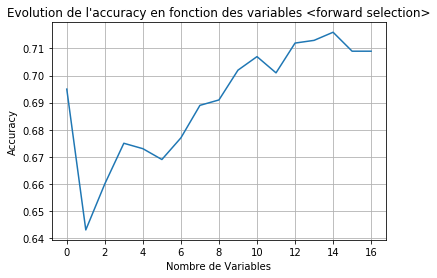

In [89]:
DT=DecisionTreeClassifier(criterion='gini',random_state=1)
scores=np.zeros(Xtrain_pca.shape[1]+1)
for f in np.arange(0, Xtrain_pca.shape[1]+1):
 X1_f = Xtrain_pca.iloc[:,sorted_idx[:f+1]]
 X2_f = Xtest_pca.iloc[:,sorted_idx[:f+1]]
 DT.fit(X1_f,Ytrain)
 YDT=DT.predict(X2_f)
 scores[f]=np.round(accuracy_score(Ytest,YDT),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables <forward selection>")
plt.grid()
plt.show()



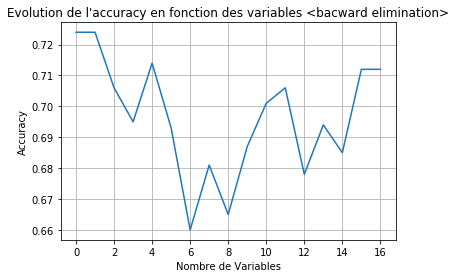

--- 0.5092761516571045 seconds ---


In [90]:
start_time = time.time()

DT=DecisionTreeClassifier(criterion='gini',random_state=1)
scores=np.zeros(Xtrain_pca.shape[1]+1)
for f in np.arange(0, Xtrain_pca.shape[1]+1):
 X1_f = Xtrain_pca.iloc[:,np.flip(sorted_idx)[:f+1]]
 X2_f = Xtest_pca.iloc[:,np.flip(sorted_idx)[:f+1]]
 DT.fit(X1_f,Ytrain)
 YDT=DT.predict(X2_f)
 scores[f]=np.round(accuracy_score(Ytest,YDT),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables <bacward elimination>")
plt.grid()
plt.show()

end_time = time.time()
print("--- %s seconds ---" % (end_time - start_time))



# BaggingClassifier

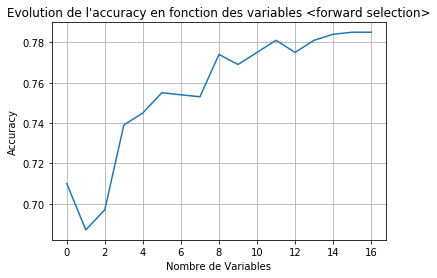

In [91]:
BAG=BaggingClassifier(n_estimators=100,random_state=1)
scores=np.zeros(Xtrain_pca.shape[1]+1)
for f in np.arange(0, Xtrain_pca.shape[1]+1):
 X1_f = Xtrain_pca.iloc[:,sorted_idx[:f+1]]
 X2_f = Xtest_pca.iloc[:,sorted_idx[:f+1]]
 BAG.fit(X1_f,Ytrain)
 YBAG=BAG.predict(X2_f)
 scores[f]=np.round(accuracy_score(Ytest,YBAG),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables <forward selection>")
plt.grid()
plt.show()



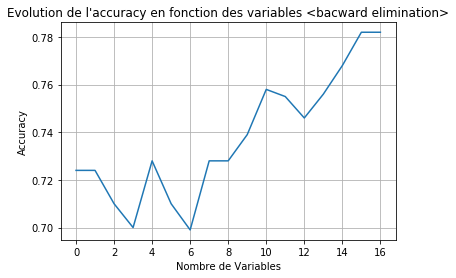

In [92]:
BAG=BaggingClassifier(n_estimators=100,random_state=1)
scores=np.zeros(Xtrain_pca.shape[1]+1)
for f in np.arange(0, Xtrain_pca.shape[1]+1):
 X1_f = Xtrain_pca.iloc[:,np.flip(sorted_idx)[:f+1]]
 X2_f = Xtest_pca.iloc[:,np.flip(sorted_idx)[:f+1]]
 BAG.fit(X1_f,Ytrain)
 YBAG=BAG.predict(X2_f)
 scores[f]=np.round(accuracy_score(Ytest,YBAG),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables <bacward elimination>")
plt.grid()
plt.show()


# TestArea

In [93]:
pca=PCA(n_components=3)
pca.fit(X_train_stand)
Xtrain_pca=np.concatenate((X_train_stand,pca.transform(X_train_stand)),axis=1)
Xtest_pca=np.concatenate((X_test_stand,pca.transform(X_test_stand)),axis=1)

nom_cols=list(X_train_stand.columns)
nom_cols+=['PCA1','PCA2','PCA3']
Xtrain_pca=pd.DataFrame(data=Xtrain_pca, columns=nom_cols)
Xtest_pca=pd.DataFrame(data=Xtest_pca, columns=nom_cols)


In [94]:
decision_tree=DecisionTreeClassifier()
param_dict = {
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(2,10),
    "min_samples_leaf":range(1,5)
}

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
grid = GridSearchCV(decision_tree,
                   param_grid=param_dict,
                   cv=10,
                   verbose=1,
                    n_jobs=-1)

In [97]:
print(grid)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         '

In [98]:
grid.fit(Xtrain_pca,Ytrain)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 1358 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 4358 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:   28.2s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         '

In [99]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 8}

In [100]:
grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [101]:
grid.best_score_

0.7636031092821216

In [102]:
clf.best_score_

AttributeError: 'RandomForestClassifier' object has no attribute 'best_score_'

In [ ]:
clf.best_score_

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

start_time = time.time()
 
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test =  Xtrain_pca, Xtest_pca, Ytrain, Ytest

# Set the parameters by cross-validation
tuned_parameters = [{
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(2,10),
    "min_samples_leaf":range(1,5)
}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        DecisionTreeClassifier(),
        tuned_parameters,
        scoring=''.join([score,'_macro']),
        verbose=1
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
end_time = time.time()




In [ ]:
print("--- %s seconds ---" % (end_time - start_time))


In [117]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

start_time = time.time()
 
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test =  Xtrain_pca, Xtest_pca, Ytrain, Ytest

# Set the parameters by cross-validation
tuned_parameters = [{
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(2,10),
    "min_samples_leaf":range(1,5)
}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        DecisionTreeClassifier(),
        tuned_parameters,
        scoring=''.join([score,'_macro']),
        n_jobs=-1,
        verbose=1
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("{:.3f} (+/-{:0.03f}) pour {}".format(mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
end_time = time.time()



Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

Grid scores on development set:

0.360 (+/-0.000) pour {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.360 (+/-0.000) pour {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 3}
0.360 (+/-0.000) pour {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 4}
0.360 (+/-0.000) pour {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.360 (+/-0.000) pour {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 6}
0.360 (+/-0.000) pour {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 7}
0.360 (+/-0.000) pour {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 8}
0.360 (+/-0.000) pour {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'm

[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    0.6s


Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 8}

Grid scores on development set:

0.500 (+/-0.000) pour {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.500 (+/-0.000) pour {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 3}
0.500 (+/-0.000) pour {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 4}
0.500 (+/-0.000) pour {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.500 (+/-0.000) pour {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 6}
0.500 (+/-0.000) pour {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 7}
0.500 (+/-0.000) pour {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 8}
0.500 (+/-0.000) pour {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'm

[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed:    3.8s finished


In [ ]:
print("--- %s seconds ---" % (end_time - start_time))


In [11]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS


In [13]:
feature_names = ('Seniority', 'Home', 'Time', 'Age', 'Marital', 'Records',
                 'Job','Expenses', 'Income', 'Assets', 'Debt', 'Amount',
                 'Price', 'PCA1','PCA2', 'PCA3')

In [14]:
DT=DecisionTreeClassifier(criterion='gini',random_state=1)
efs1 = EFS(DT, 
           min_features=1,
           max_features=len(Xtrain_pca.columns),
           scoring='precision',
           print_progress=True,
           cv=5,
           n_jobs=-1,
          pre_dispatch=8*5)

In [16]:
start_time = time.time()

efs1 = efs1.fit(Xtrain_pca, Ytrain,
                custom_feature_names=feature_names)

end_time = time.time()


Features: 65535/65535

In [23]:
print("--- %s minutes ---" % ((end_time - start_time)/60))


--- 12.164053889115651 minutes ---


In [18]:
feature_selection_data = pd.DataFrame.from_dict(efs1.get_metric_dict()).T
feature_selection_data.sort_values('avg_score', inplace=True, ascending=False)


In [80]:
feature_selection_data

,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
4567,0.817273,0.0148541,"[0.8360655737704918, 0.8135048231511254, 0.805...","(1, 5, 6, 9, 10)","(Home, Records, Job, Assets, Debt)",0.011557,0.00577852
5104,0.81683,0.0132169,"[0.83, 0.8179012345679012, 0.8037974683544303,...","(2, 4, 5, 6, 9)","(Time, Marital, Records, Job, Assets)",0.0102832,0.00514161
533,0.815256,0.019597,"[0.8353658536585366, 0.8138138138138138, 0.789...","(5, 6, 9)","(Records, Job, Assets)",0.0152471,0.00762355
65207,0.81295,0.0263285,"[0.8355263157894737, 0.7864077669902912, 0.835...","(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15)","(Seniority, Time, Age, Marital, Records, Job, ...",0.0204844,0.0102422
33108,0.812251,0.00764316,"[0.8084415584415584, 0.8215488215488216, 0.805...","(1, 2, 3, 5, 6, 7, 9, 14)","(Home, Time, Age, Records, Job, Expenses, Asse...",0.00594663,0.00297332
65265,0.811211,0.00790303,"[0.8169491525423729, 0.804635761589404, 0.8187...","(0, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15)","(Seniority, Time, Age, Records, Job, Income, A...",0.00614883,0.00307441
2201,0.810995,0.0224972,"[0.840531561461794, 0.8125, 0.7874251497005988...","(5, 6, 9, 10)","(Records, Job, Assets, Debt)",0.0175036,0.00875179
4389,0.810981,0.0117587,"[0.8053892215568862, 0.8213166144200627, 0.801...","(1, 4, 5, 6, 9)","(Home, Marital, Records, Job, Assets)",0.00914865,0.00457432
63910,0.810802,0.0169195,"[0.8181818181818182, 0.7845117845117845, 0.817...","(0, 1, 3, 5, 6, 7, 8, 9, 11, 12, 14, 15)","(Seniority, Home, Age, Records, Job, Expenses,...",0.0131639,0.00658197
53705,0.810769,0.0124989,"[0.8173076923076923, 0.819672131147541, 0.7947...","(0, 2, 3, 4, 5, 6, 8, 9, 10, 15)","(Seniority, Time, Age, Marital, Records, Job, ...",0.00972457,0.00486229


In [81]:
feature_selection_data.cv_scores[0]

array([0.7591623 , 0.7565445 , 0.74739583, 0.77225131, 0.73333333])

In [74]:
feature_selection_data.to_csv('feature_selection_data-decision_tree.csv',index=False)

In [77]:
print('Best subset (corresponding names):', efs1.best_feature_names_)


Best subset (corresponding names): ('Home', 'Records', 'Job', 'Assets', 'Debt')


In [91]:
Xtrain_pca.columns

Index(['Seniority', 'Home', 'Time', 'Age', 'Marital', 'Records', 'Job',
       'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price', 'PCA1',
       'PCA2', 'PCA3'],
      dtype='object')

In [92]:
t=['Seniority', 'Home', 'Time', 'Age', 'Marital', 'Records', 'Job',
       'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price', 'PCA1',
       'PCA2', 'PCA3']
c = [t[index] for index in [1, 5, 6, 9, 10]]

In [104]:
DT=DecisionTreeClassifier(criterion='gini',random_state=1)
DT.fit(Xtrain_pca,Ytrain)
YDT=DT.predict(Xtest_pca)
print("Arbre de décision : Accuracy = {0:.2f}".format(accuracy_score(Ytest,YDT)*100))
print(confusion_matrix(Ytest,YDT))

        

Arbre de décision : Accuracy = 71.71
[[ 329  275]
 [ 344 1240]]


In [105]:
DT=DecisionTreeClassifier(criterion='gini',random_state=1)
DT.fit( Xtrain_pca[c],Ytrain)
YDT=DT.predict(Xtest_pca[c])
print("Arbre de décision : Accuracy = {0:.2f}".format(accuracy_score(Ytest,YDT)*100))
print(confusion_matrix(Ytest,YDT))


Arbre de décision : Accuracy = 72.71
[[ 315  289]
 [ 308 1276]]


In [111]:
p=dict(criterion= 'gini',
 max_depth= 4,
 min_samples_leaf= 1,
 min_samples_split= 5)

In [112]:
DT=DecisionTreeClassifier(**p)
DT.fit( Xtrain_pca[c],Ytrain)
YDT=DT.predict(Xtest_pca[c])
print("Arbre de décision : Accuracy = {0:.2f}".format(accuracy_score(Ytest,YDT)*100))
print(confusion_matrix(Ytest,YDT))


Arbre de décision : Accuracy = 74.41
[[ 173  431]
 [ 129 1455]]


In [29]:
import winsound  
  
# frequency is set to 500Hz 
freq = 500 
  
# duration is set to 100 milliseconds              
dur = 100
               
winsound.Beep(freq, dur) 


LR: 0.793301 (0.030872)
LDA: 0.784609 (0.029341)
KNN: 0.741636 (0.023002)
CART: 0.713311 (0.018190)
NB: 0.745314 (0.032956)
SVM: 0.782328 (0.026613)


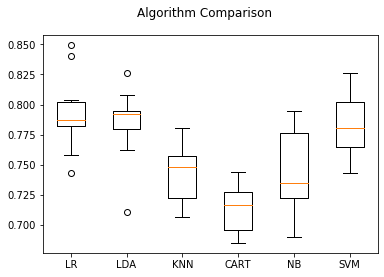

In [148]:

# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
X = Xtrain_pca
Y = Ytrain
# prepare configuration for cross validation test harness
seed = 0
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import tree

X_train, X_test, y_train, y_test =  Xtrain_pca, Xtest_pca, Ytrain, Ytest

# Construct pipeline
pipe = Pipeline([('scl', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('clf', tree.DecisionTreeClassifier(random_state=42))])

param_range = list(range(1,11))

# Set grid search params
grid_params = [{'clf__criterion': ['gini', 'entropy'],
            'clf__min_samples_leaf': param_range,
            'clf__max_depth': param_range,
            'clf__min_samples_split': param_range[1:],
            'clf__presort': [True, False]}]

# Construct grid search
gs = GridSearchCV(estimator=pipe,
                param_grid=grid_params,
                scoring='accuracy',
                cv=10,
                 n_jobs=-1,
                 verbose=1)

# Fit using grid search
gs.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs.best_score_)

# Best params
print('\nBest params:\n', gs.best_params_)

Fitting 10 folds for each of 3600 candidates, totalling 36000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 1047 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 3047 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 5847 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 9447 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 13847 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 19047 tasks      | elapsed:   58.2s
[Parallel(n_jobs=-1)]: Done 25047 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 31847 tasks      | elapsed:  1.6min


Best accuracy: 0.721

Best params:
 {'clf__criterion': 'gini', 'clf__max_depth': 3, 'clf__min_samples_leaf': 9, 'clf__min_samples_split': 5, 'clf__presort': True}


[Parallel(n_jobs=-1)]: Done 36000 out of 36000 | elapsed:  1.9min finished


In [ ]:
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test =  Xtrain_pca, Xtest_pca, Ytrain, Ytest

# Construct pipeline
pipe = Pipeline([('scl', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('clf', LogisticRegression())])

param_range = list(range(1,11))

# Set grid search params
grid_params = [{"clf__C":np.logspace(-3,3,7),
                "clf__penalty":["l1","l2"]}]

# Construct grid search
gs = GridSearchCV(estimator=pipe,
                param_grid=grid_params,
                scoring='accuracy',
                cv=10,
                 n_jobs=-1,
                 verbose=1)

# Fit using grid search
gs.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs.best_score_)

# Best params
print('\nBest params:\n', gs.best_params_)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s


Best accuracy: 0.722

Best params:
 {'clf__C': 0.1, 'clf__penalty': 'l1'}


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    4.5s finished


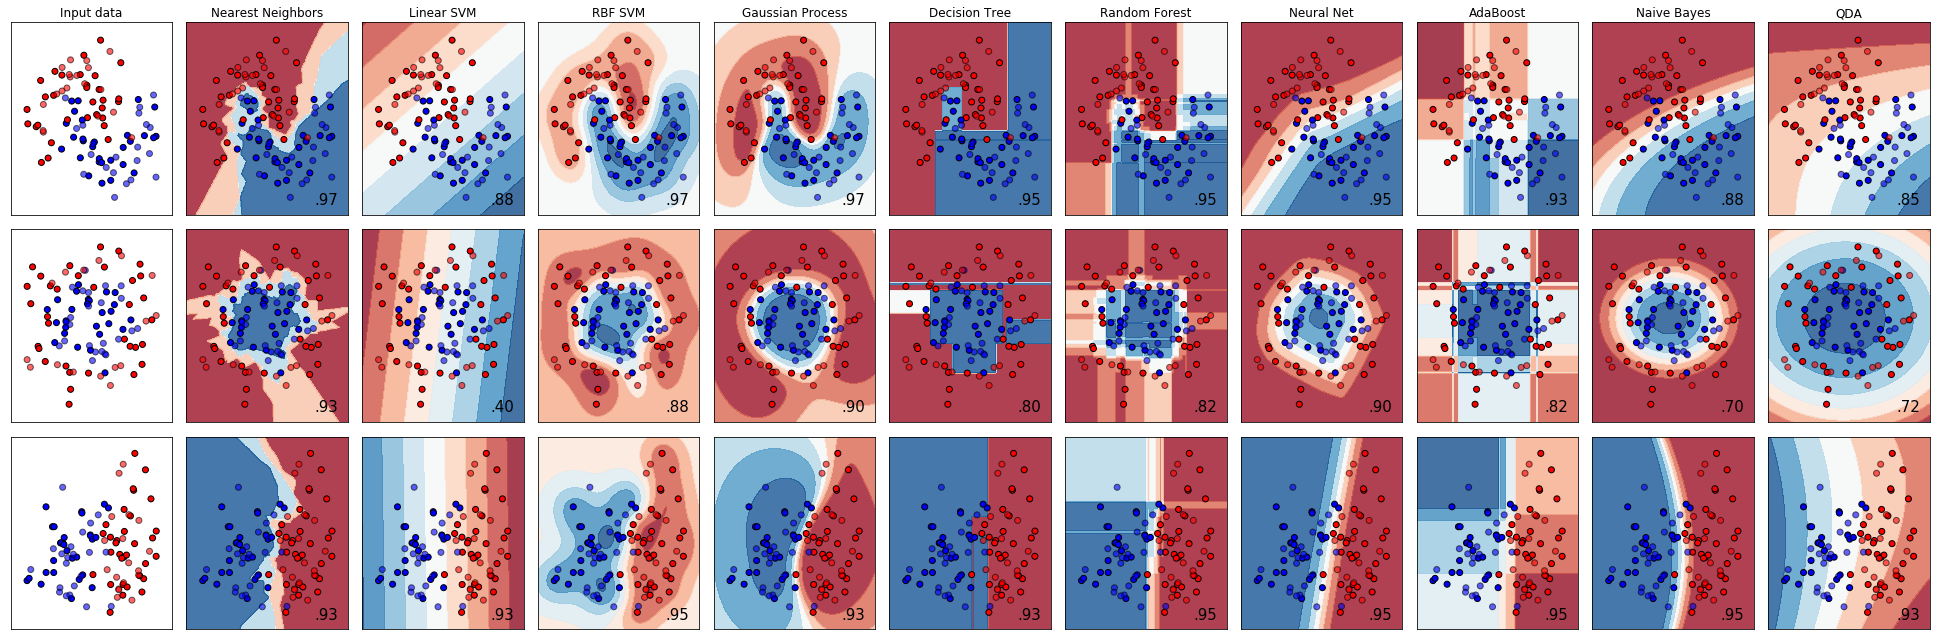

In [161]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()